Dataste:  https://drive.google.com/drive/folders/1sDAdGeQxTYGz00_zPL0mcVFieBo_2KmL?usp=share_link

Answer (a)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [22]:
train_data = pd.read_csv("/Users/harshitlakum/Desktop/exoTrain.csv")
test_data = pd.read_csv("/Users/harshitlakum/Desktop/exoTest.csv")

In [24]:
# Inputs and outputs for training data
X_train = train_data.iloc[:, 1:].values  # all rows, from the second column to the end
y_train = train_data.iloc[:, 0].values   # all rows, just the first column

# Inputs and outputs for testing data
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values


In [25]:
# Normalize using training data statistics
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

# Avoid division by zero in case of zero standard deviation
std_train[std_train == 0] = 1

X_train = (X_train - mean_train) / std_train
X_test = (X_test - mean_train) / std_train


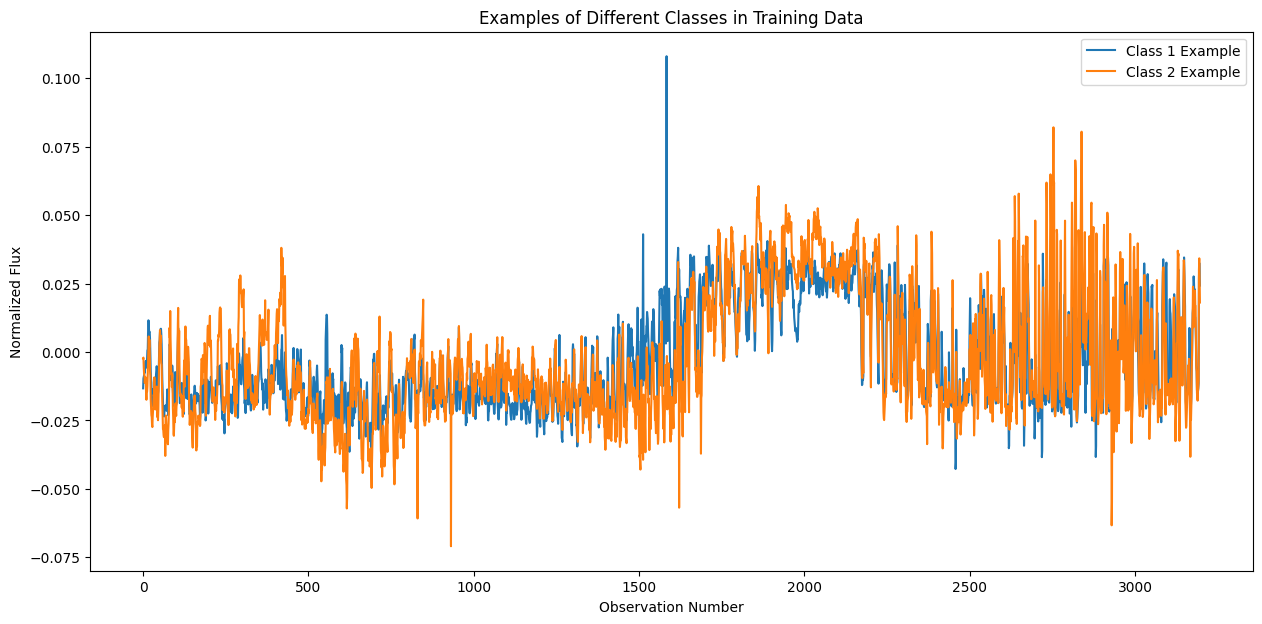

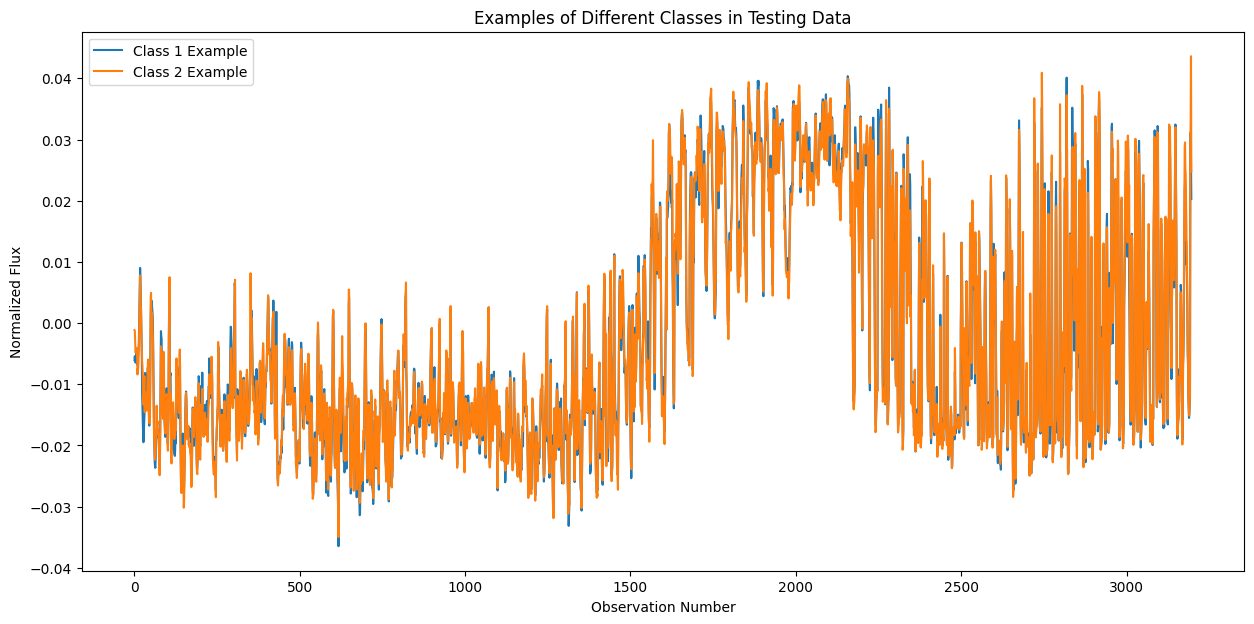

In [26]:
def plot_examples(X, y, title):
    plt.figure(figsize=(15, 7))
    classes = np.unique(y)
    for c in classes:
        # Find the index of the first occurrence of each class
        index = np.where(y == c)[0][0]
        plt.plot(X[index], label=f'Class {c} Example')
    plt.title(title)
    plt.xlabel('Observation Number')
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.show()

# Plot examples for each class in the training data
plot_examples(X_train, y_train, 'Examples of Different Classes in Training Data')

# Plot examples for each class in the testing data
plot_examples(X_test, y_test, 'Examples of Different Classes in Testing Data')


Answer(B) Create a CNN model and 
Answer(C) Train the model

In [27]:
X_train_final = X_train[..., np.newaxis] 
y_train_transformed = (y_train == 2).astype(int)
y_test_transformed = (y_test == 2).astype(int)





In [29]:
'''import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam'''


# Build the model
model = Sequential([
    Input(shape=(3197, 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    X_train, y_train_transformed, 
    epochs=10, 
    batch_size=20, 
    validation_split=0.2, 
    )




Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 35s 164ms/step - accuracy: 0.9893 - loss: 0.1129 - val_accuracy: 1.0000 - val_loss: 0.0550
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - accuracy: 0.9914 - loss: 0.0681 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.9892 - loss: 0.0716 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - accuracy: 0.9904 - loss: 0.0575 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 33s 163ms/step - accuracy: 0.9902 - loss: 0.0642 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 35s 171ms/step - accuracy: 0.9927 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - accuracy: 0.9925 - loss: 0.0537 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - accuracy: 0.9917 - loss: 0

Answer(D) Evaluate the model on a validation and test dataset.

In [30]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_transformed)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print(f"Test Loss: {test_loss}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9708 - loss: 0.1712
Test Accuracy: 99.12%
Test Loss: 0.05312148854136467


In [31]:
# Predict probabilities
predicted_probabilities = model.predict(X_test)

# Convert probabilities to class predictions
predicted_classes = (predicted_probabilities > 0.5).astype(int).flatten()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [36]:


# Calculate the confusion matrix
cm = confusion_matrix(y_test_transformed, predicted_classes)
print("Confusion Matrix:\n", cm)

# Calculate accuracy from the confusion matrix
accuracy = accuracy_score(y_test_transformed, predicted_classes)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Confusion Matrix:
 [[565   0]
 [  5   0]]
Accuracy: 99.12%


In [43]:
report = classification_report(y_test_transformed, predicted_classes, target_names=['Class 0', 'Class 1'],  zero_division=1)
print(report)


              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       565
     Class 1       1.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       1.00      0.50      0.50       570
weighted avg       0.99      0.99      0.99       570



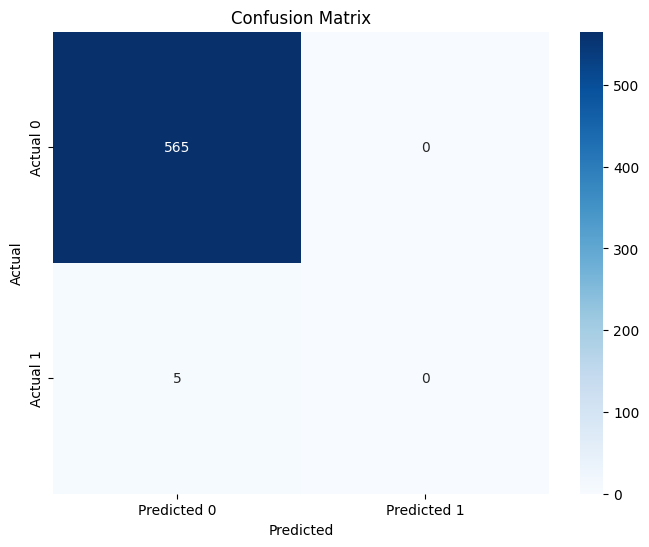

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Answer(E) network is not effective at classifying "stars" correctly if by "stars" we mean Class 1. The network is highly accurate in identifying Class 0 but fails entirely for Class 1. This could be due to several reasons, such as class imbalance, inadequate model architecture or parameters, insufficient training on Class 1, or lack of representative features in the data for Class 1.

Answer(F) Tune the different hyperparameters

In [45]:
'''import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam'''
 


# Build the model
model = Sequential([
    Input(shape=(3197, 1)),
    Conv1D(filters=32, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    X_train, y_train_transformed, 
    epochs=10, 
    batch_size=30, 
    validation_split=0.2, 
    )




Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - accuracy: 0.9709 - loss: 0.1585 - val_accuracy: 1.0000 - val_loss: 0.0131
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.9922 - loss: 0.0481 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.9905 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9915 - loss: 0.0522 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.9894 - loss: 0.0609 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.9900 - loss: 0.0663 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9902 - loss: 0.0517 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.9888 - loss: 0.

In [53]:
# Evaluate the model on the test data
test_loss2, test_acc2 = model.evaluate(X_test, y_test_transformed)
print("Test Accuracy2: {:.2f}%".format(test_acc2 * 100))
print(f"Test Los2: {test_loss2}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9708 - loss: 0.7020
Test Accuracy2: 99.12%
Test Los2: 0.21082575619220734


These results suggest that whatever modifications were made between these tests, they helped in reducing the model's error rate, i.e., the model predictions have become more aligned with the expected outputs.

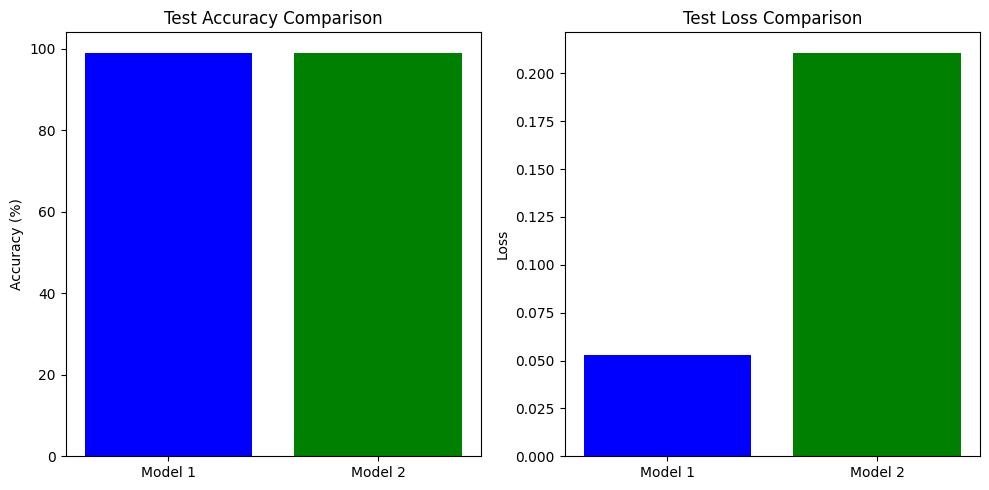

In [55]:
# Model results
accuracy = [99.12, 99.12]  # Accuracy for both models
loss = [0.05312148854136467, 0.21082575619220734]  # Loss for both models

# Set up the figure size and labels
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot accuracy
ax[0].bar(['Model 1', 'Model 2'], accuracy, color=['blue', 'green'])
ax[0].set_title('Test Accuracy Comparison')
ax[0].set_ylabel('Accuracy (%)')

# Plot loss
ax[1].bar(['Model 1', 'Model 2'], loss, color=['blue', 'green'])
ax[1].set_title('Test Loss Comparison')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [59]:
from imblearn.over_sampling import SMOTE




# Apply SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




Before SMOTE: 5087
After SMOTE: 10100
Before SMOTE: 5087
After SMOTE: 10100


In [65]:
X_train_final2 = X_train_smote[..., np.newaxis] 
y_train_transformed2 = (y_train_smote == 2).astype(int)





Answer(G) augmentation

In [68]:
'''import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam'''


# Build the model
model = Sequential([
    Input(shape=X_train_final2.shape[1:]),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    X_train_smote, y_train_transformed2, 
    epochs=10, 
    batch_size=20, 
    validation_split=0.2, 
    )

# Evaluate the model on the test data
test_loss2, test_acc2 = model.evaluate(X_test, y_test_transformed)
print("Test Accuracy2: {:.2f}%".format(test_acc2 * 100))
print(f"Test Los2: {test_loss2}")


Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 67s 163ms/step - accuracy: 0.6341 - loss: 0.7169 - val_accuracy: 0.1619 - val_loss: 0.9897
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 66s 164ms/step - accuracy: 0.7282 - loss: 0.5518 - val_accuracy: 0.6480 - val_loss: 0.5194
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 66s 164ms/step - accuracy: 0.8161 - loss: 0.4216 - val_accuracy: 0.9272 - val_loss: 0.2296
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 68s 168ms/step - accuracy: 0.8936 - loss: 0.2720 - val_accuracy: 0.9495 - val_loss: 0.1782
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 67s 165ms/step - accuracy: 0.9307 - loss: 0.1870 - val_accuracy: 0.9896 - val_loss: 0.0743
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 68s 168ms/step - accuracy: 0.9535 - loss: 0.1248 - val_accuracy: 0.9896 - val_loss: 0.0575
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 67s 165ms/step - accuracy: 0.9682 - loss: 0.1071 - val_accuracy: 0.9990 - val_loss: 0.0355
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 68s 169ms/step - accuracy: 0.9740 - loss: 0

Yes it does, working good compare to previous 